In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential
import datetime
import pandas_datareader as pdr
import yfinance as yf
import datetime
btc = yf.download('BTC-USD', start=datetime.datetime(2018, 1, 1), end=datetime.datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [39]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(btc['Close'].values.reshape(-1,1))

In [41]:
prediction=60
xtrain,ytrain=[],[]
for _ in range(prediction,len(scaled_data)):
  xtrain.append(scaled_data[_-prediction:_,0])
  ytrain.append(scaled_data[_,0])
xtrain,ytrain=np.array(xtrain),np.array(ytrain)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [42]:
m=Sequential()
m.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50,return_sequences=True))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer='adam',loss='mae')
m.fit(xtrain,ytrain,epochs=25,batch_size=32)

Epoch 1/25
65/65 [==============================] - 6s 12ms/step - loss: 0.0590
Epoch 2/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0364
Epoch 3/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0326
Epoch 4/25
65/65 [==============================] - 1s 12ms/step - loss: 0.0334
Epoch 5/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0300
Epoch 6/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0319
Epoch 7/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0296
Epoch 8/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0293
Epoch 9/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0258
Epoch 10/25
65/65 [==============================] - 1s 11ms/step - loss: 0.0273
Epoch 11/25
65/65 [==============================] - 1s 15ms/step - loss: 0.0260
Epoch 12/25
65/65 [==============================] - 1s 15ms/step - loss: 0.0254
Epoch 13/25
65/65 [==================

In [45]:
tstart=datetime.datetime(2018,1,1)
tend=datetime.datetime.now()
btcx = yf.download('BTC-USD', start=tstart, end=tend)
actual=btcx['Close'].values
totaldataset=pd.concat((btc['Close'],btcx['Close']),axis=0)
model_inputs=totaldataset[len(totaldataset)-len(btcx)-prediction:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)
x_test=[]
for _ in range(prediction,len(model_inputs)):
  x_test.append(model_inputs[_-prediction:_,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
prediction_prices=m.predict(xtrain)
prediction_prices=scaler.inverse_transform(prediction_prices)

[*********************100%%**********************]  1 of 1 completed
65/65 [==============================] - 0s 6ms/step


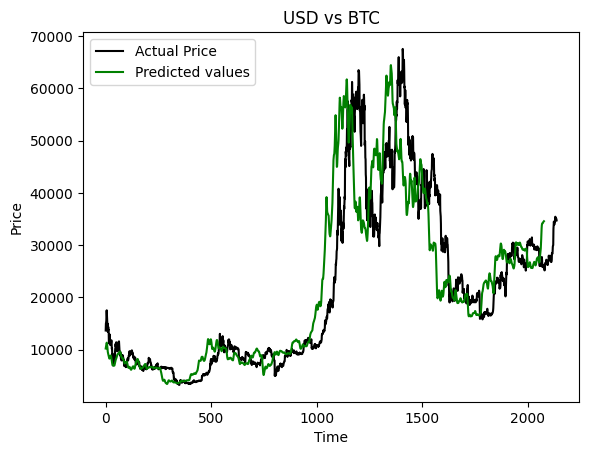

In [46]:
plt.plot(actual,color='black',label='Actual Price')
plt.plot(prediction_prices,color='green',label='Predicted values')
plt.title(f'USD vs BTC')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()